Business Objectives

Request in Brief:

Identifying the problem of the cabs which may cause for Non-availabilty or Cancallation the 
Trip From Railway-station to Different parts of City

In [1]:
#Import the Packages 
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT DATA

In [2]:
obj_uber = pd.read_csv('F:/Uber_Request_Data.csv')
obj_uber.head(5)

,Request_id,Pickup_point,Driver_point,Status,Request_timestamp,Drop _timestamp
0,619,Railwaystation,Hyderabad,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Railwaystation,Hyderabad,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,Airport,Hyderabad,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Railwaystation,Hyderabad,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,Airport,Hyderabad,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
obj_uber.describe()

,Request_id
count,6745.000000
mean,3384.644922
std,1955.099667
min,1.000000
25%,1691.000000
50%,3387.000000
75%,5080.000000
max,6766.000000


In [4]:
# Checking for data types for each column
obj_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_point         6745 non-null object
Status               6745 non-null object
Request_timestamp    6745 non-null object
Drop _timestamp      2831 non-null object
dtypes: int64(1), object(5)
memory usage: 184.5+ KB


In [5]:
obj_uber.shape
#so there are 6745 records

(6745, 6)

In [6]:
obj_uber

,Request_id,Pickup_point,Driver_point,Status,Request_timestamp,Drop _timestamp
0,619,Railwaystation,Hyderabad,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Railwaystation,Hyderabad,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,Airport,Hyderabad,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Railwaystation,Hyderabad,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,Airport,Hyderabad,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Railwaystation,Hyderabad,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Railwaystation,Hyderabad,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Railwaystation,Hyderabad,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,Airport,Hyderabad,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,Airport,Hyderabad,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [7]:
# If duplcate requests are recorded
sum(obj_uber['Request_id'].value_counts()>1)

0

DATA CLEANING

In [8]:
#Checking for null value
obj_uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_point            0
Status                  0
Request_timestamp       0
Drop _timestamp      3914
dtype: int64

In [9]:
print(obj_uber['Status'].value_counts())
print(' - For "No car available"')
print(obj_uber[obj_uber['Status']=='No Cars Available'].isnull().sum())
print(' - For "Cancelled"')
print(obj_uber[obj_uber['Status']=='Cancelled'].isnull().sum())
print(2650+1264)
# All the blank values are valid

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64
 - For "No car available"
Request_id              0
Pickup_point            0
Driver_point            0
Status                  0
Request_timestamp       0
Drop _timestamp      2650
dtype: int64
 - For "Cancelled"
Request_id              0
Pickup_point            0
Driver_point            0
Status                  0
Request_timestamp       0
Drop _timestamp      1264
dtype: int64
3914


In [10]:
# Driver id put as 0 if NA
obj_uber['Driver_point'].fillna(0,inplace=True)

In [11]:
# converting Requestid to categorical variable
obj_uber['Request_id'] = obj_uber['Request_id'].astype(str)

In [12]:
# converting Request timestamp to datetime
obj_uber['Request_timestamp'] = pd.to_datetime(obj_uber['Request_timestamp'],dayfirst=True)

In [13]:
obj_uber.isnull

<bound method DataFrame.isnull of      Request_id    Pickup_point Driver_point             Status  \
0           619  Railwaystation    Hyderabad     Trip Completed   
1           867  Railwaystation    Hyderabad     Trip Completed   
2          1807         Airport    Hyderabad     Trip Completed   
3          2532  Railwaystation    Hyderabad     Trip Completed   
4          3112         Airport    Hyderabad     Trip Completed   
5          3879  Railwaystation    Hyderabad     Trip Completed   
6          4270  Railwaystation    Hyderabad     Trip Completed   
7          5510  Railwaystation    Hyderabad     Trip Completed   
8          6248         Airport    Hyderabad     Trip Completed   
9           267         Airport    Hyderabad     Trip Completed   
10         1467  Railwaystation    Hyderabad     Trip Completed   
11         1983         Airport    Hyderabad     Trip Completed   
12         2784  Railwaystation    Hyderabad     Trip Completed   
13         3075         Airp

In [14]:
obj_fillna=obj_uber.fillna(0)
obj_fillna


,Request_id,Pickup_point,Driver_point,Status,Request_timestamp,Drop _timestamp
0,619,Railwaystation,Hyderabad,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Railwaystation,Hyderabad,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,Airport,Hyderabad,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Railwaystation,Hyderabad,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,Airport,Hyderabad,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47
5,3879,Railwaystation,Hyderabad,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59
6,4270,Railwaystation,Hyderabad,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15
7,5510,Railwaystation,Hyderabad,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52
8,6248,Airport,Hyderabad,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51
9,267,Airport,Hyderabad,Trip Completed,2016-07-11 06:46:00,11/7/2016 7:25


Checking if Drop time is before request time

In [15]:
#obj_uber.loc[obj_uber['Drop_timestamp']<obj_uber['Request timestamp'],:]
# There are no records with older request date than drop date.

In [16]:
obj_nan=obj_uber.dropna(axis=1)
obj_nan

,Request_id,Pickup_point,Driver_point,Status,Request_timestamp
0,619,Railwaystation,Hyderabad,Trip Completed,2016-07-11 11:51:00
1,867,Railwaystation,Hyderabad,Trip Completed,2016-07-11 17:57:00
2,1807,Airport,Hyderabad,Trip Completed,2016-07-12 09:17:00
3,2532,Railwaystation,Hyderabad,Trip Completed,2016-07-12 21:08:00
4,3112,Airport,Hyderabad,Trip Completed,2016-07-13 08:33:16
5,3879,Railwaystation,Hyderabad,Trip Completed,2016-07-13 21:57:28
6,4270,Railwaystation,Hyderabad,Trip Completed,2016-07-14 06:15:32
7,5510,Railwaystation,Hyderabad,Trip Completed,2016-07-15 05:11:52
8,6248,Airport,Hyderabad,Trip Completed,2016-07-15 17:57:27
9,267,Airport,Hyderabad,Trip Completed,2016-07-11 06:46:00


In [17]:
obj_uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_point            0
Status                  0
Request_timestamp       0
Drop _timestamp      3914
dtype: int64



We can bin the request time into various categories:

    1.Early Morning: 00:00:00 to 03:00:00
    2.Mid Morning: 03:00:01 to 06:00:00
    3.Late Morning: 06:00:01 to 09:00:00
    4.Before Noon: 09:00:01 to 12:00:00
    5.After Noon: 12:00:01 to 15:00:00
    6.Evening: 15:00:01 to 18:00:00
    7.Late Evening: 18:00:01 to 21:00:00
    8.Night: 21:00:01 to 23:59:59



In [18]:
# Binning time into part of the day as per above
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time >= dt.time(0,0,0)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(3,0,0))
         ,'Day_part'] = 'EarlyMorning'

In [19]:
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time > dt.time(3,0,1)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(6,0,0)),
         'Day_part'] = 'MidMorning'

In [20]:
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time > dt.time(6,0,1)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(9,0,0)),
             'Day_part'] = 'LateMorning'

In [21]:
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time > dt.time(9,0,1)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(12,0,0)),
         'Day_part'] = 'BeforeNoon'

In [22]:
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time > dt.time(12,0,1)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(15,0,0)),
         'Day_part'] = 'AfterNoon'

In [23]:
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time > dt.time(15,0,1)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(18,0,0)),
         'Day_part'] = 'Evening'

In [24]:
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time > dt.time(18,0,1)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(21,0,0)),
         'Day_part'] = 'LateEvening'

In [25]:
obj_uber.loc[(obj_uber.loc[:,'Request_timestamp'].dt.time > dt.time(21,0,1)) & (obj_uber.loc[:,'Request_timestamp'].dt.time <= dt.time(23,59,59)),
         'Day_part'] = 'Night'


To check how much time each ride took (in Min):

In [26]:
obj_uber.head(5)

,Request_id,Pickup_point,Driver_point,Status,Request_timestamp,Drop _timestamp,Day_part
0,619,Railwaystation,Hyderabad,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,BeforeNoon
1,867,Railwaystation,Hyderabad,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,Evening
2,1807,Airport,Hyderabad,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,BeforeNoon
3,2532,Railwaystation,Hyderabad,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,Night
4,3112,Airport,Hyderabad,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,LateMorning


In [27]:
#obj_uber['Ride_time'] = obj_uber['Drop_timestamp'] - obj_uber['Request_timestamp']
#obj_uber['Ride_time'] = pd.DatetimeIndex(uber['Ride_time']).hour*60 + pd.DatetimeIndex(uber['Ride_time']).minute


In [28]:
obj_uber.loc[obj_uber['Pickup_point']=='Airport','Path'] = 'Airport_to_City'
obj_uber.loc[obj_uber['Pickup_point']=='Railwaystation','Path'] = 'Railwaystation_to_City'

In [29]:
obj_uber.head(5)

,Request_id,Pickup_point,Driver_point,Status,Request_timestamp,Drop _timestamp,Day_part,Path
0,619,Railwaystation,Hyderabad,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,BeforeNoon,Railwaystation_to_City
1,867,Railwaystation,Hyderabad,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,Evening,Railwaystation_to_City
2,1807,Airport,Hyderabad,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,BeforeNoon,Airport_to_City
3,2532,Railwaystation,Hyderabad,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,Night,Railwaystation_to_City
4,3112,Airport,Hyderabad,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,LateMorning,Airport_to_City


In [30]:
obj_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
Request_id           6745 non-null object
Pickup_point         6745 non-null object
Driver_point         6745 non-null object
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop _timestamp      2831 non-null object
Day_part             6745 non-null object
Path                 6745 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 237.2+ KB


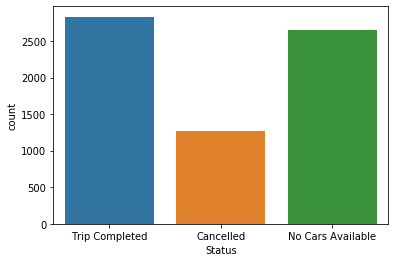

In [31]:
# Count on Status
#obj_uber['Status'].value_counts().plot(kind='bar')
sns.countplot(x="Status",data=obj_uber)

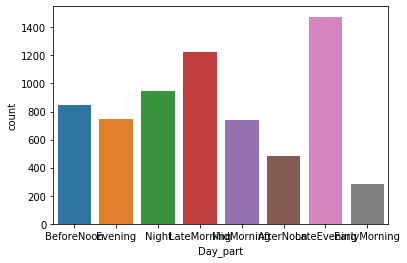

In [32]:
# Count on part of the day
#obj_uber['Day_part'].value_counts()
plt.figure(figsize=(80,50))
sns.countplot(x="Day_part",data=obj_uber)

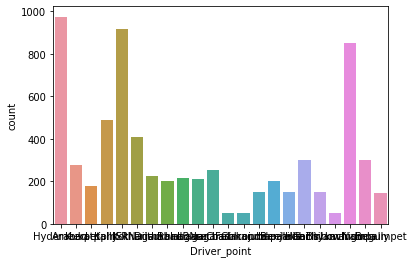

In [33]:
# Count on part of the day
plt.figure(figsize=(80,50))
sns.countplot(x="Driver_point",data=obj_uber)

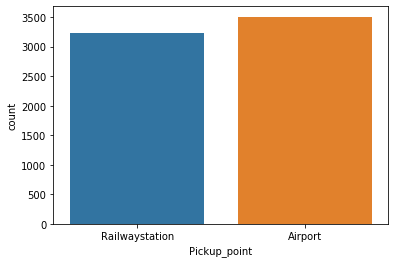

In [34]:
#obj_uber['Pickup_point'].value_counts().plot(kind='barh')
sns.countplot(x="Pickup_point",data=obj_uber)

In [35]:
obj_picktrip = obj_uber[['Pickup_point','Driver_point']]
obj_picktrip.head(6)

,Pickup_point,Driver_point
0,Railwaystation,Hyderabad
1,Railwaystation,Hyderabad
2,Airport,Hyderabad
3,Railwaystation,Hyderabad
4,Airport,Hyderabad
5,Railwaystation,Hyderabad


In [36]:
# we have to dran visulization Grap here to show how many are travelling from RS to City
#Airport to CIty


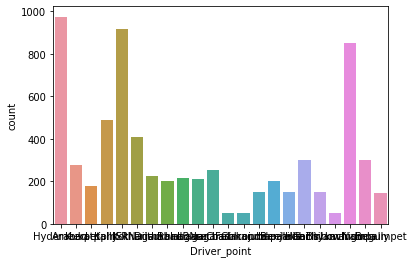

In [37]:
plt.figure(figsize=(80,50))
sns.countplot(x="Driver_point",data=obj_uber)

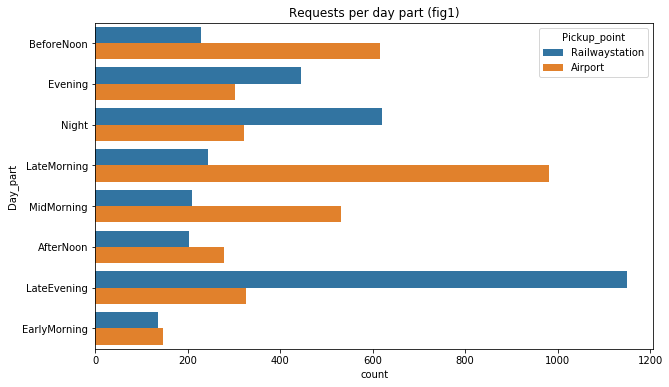

In [38]:
# Total requests grouped by Path
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Day_part',hue='Pickup_point',data=obj_uber)
plt.title('Requests per day part (fig1)')
plt.show()

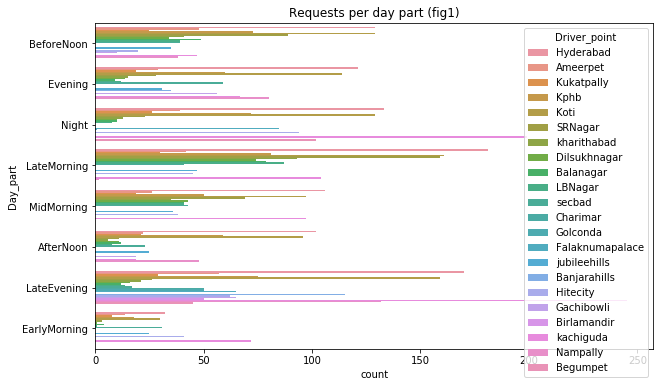

In [39]:
fig = plt.figure(figsize=(10,6))
#sns.countplot(y='Day_part',hue='Pickup_point',data=obj_uber)
sns.countplot(y='Day_part',hue='Driver_point',data=obj_uber)
plt.title('Requests per day part (fig1)')
plt.show()


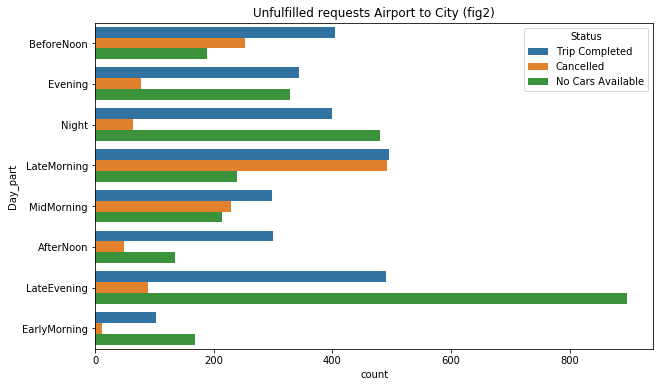

In [40]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Day_part',hue='Status',data=obj_uber)

#sns.countplot(y='Day_part',hue='Status',data=uber[(uber['Status']!='Trip Completed') & (uber['Path']=='City_to_Airport')])
plt.title('Unfulfilled requests Airport to City (fig2)')
plt.show()

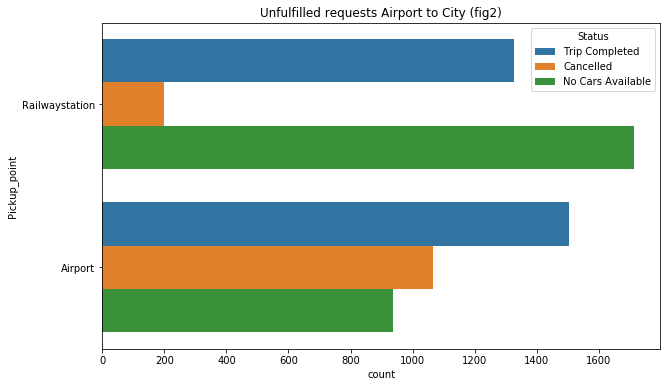

In [41]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Pickup_point',hue='Status',data=obj_uber)

#sns.countplot(y='Day_part',hue='Status',data=uber[(uber['Status']!='Trip Completed') & (uber['Path']=='City_to_Airport')])
plt.title('Unfulfilled requests Airport to City (fig2)')
plt.show()

In [42]:
# Total Metrics for Demand Supply and Gap
Total_Demand = obj_uber.groupby('Day_part')['Request_id'].agg(['count'])
Total_Supply = obj_uber[obj_uber['Status']=='Trip Completed'].groupby('Day_part')['Request_id'].agg(['count'])
DS_Total = pd.concat([Total_Demand['count'],Total_Supply['count']],axis=1,keys=['Demand','Supply'])
DS_Total['Gap'] = DS_Total['Demand']-DS_Total['Supply']

In [43]:
print(DS_Total)
print('--'*20)
print('Mean values from Airport:')
print(DS_Total.describe().mean())

              Demand  Supply  Gap
Day_part                         
AfterNoon        482     300  182
BeforeNoon       845     404  441
EarlyMorning     283     102  181
Evening          749     343  406
LateEvening     1475     490  985
LateMorning     1226     495  731
MidMorning       741     298  443
Night            944     399  545
----------------------------------------
Mean values from Airport:
Demand    684.812860
Supply    272.711571
Gap       414.522163
dtype: float64


In [44]:
obj_uber.head(5)

,Request_id,Pickup_point,Driver_point,Status,Request_timestamp,Drop _timestamp,Day_part,Path
0,619,Railwaystation,Hyderabad,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,BeforeNoon,Railwaystation_to_City
1,867,Railwaystation,Hyderabad,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,Evening,Railwaystation_to_City
2,1807,Airport,Hyderabad,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,BeforeNoon,Airport_to_City
3,2532,Railwaystation,Hyderabad,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,Night,Railwaystation_to_City
4,3112,Airport,Hyderabad,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,LateMorning,Airport_to_City


In [45]:
Total_Demand = obj_uber.groupby('Day_part')['Request_id'].agg(['count'])
Total_Supply = obj_uber[obj_uber['Status']=='No Cars Available'].groupby('Day_part')['Request_id'].agg(['count'])
DS_Total1A = pd.concat([Total_Demand['count'],Total_Supply['count']],axis=1,keys=['Demand','Supply'])
DS_Total1A['Gap'] = DS_Total1A['Demand']-DS_Total1A['Supply']

In [46]:
print(DS_Total1A)
print('--'*20)
print('Mean values from Airport:')
print(DS_Total1A.describe().mean())

              Demand  Supply  Gap
Day_part                         
AfterNoon        482     134  348
BeforeNoon       845     189  656
EarlyMorning     283     169  114
Evening          749     328  421
LateEvening     1475     896  579
LateMorning     1226     239  987
MidMorning       741     214  527
Night            944     481  463
----------------------------------------
Mean values from Airport:
Demand    684.812860
Supply    299.911699
Gap       421.198848
dtype: float64


In [47]:
Total_Demand = obj_uber.groupby('Day_part')['Request_id'].agg(['count'])
Total_Supply = obj_uber[obj_uber['Status']=='Cancelled'].groupby('Day_part')['Request_id'].agg(['count'])
DS_Total2C = pd.concat([Total_Demand['count'],Total_Supply['count']],axis=1,keys=['Demand','Supply'])
DS_Total2C['Gap'] = DS_Total2C['Demand']-DS_Total2C['Supply']

In [48]:
print(DS_Total2C)
print('--'*20)
print('Mean values from City:')
print(DS_Total2C.describe().mean())

              Demand  Supply   Gap
Day_part                          
AfterNoon        482      48   434
BeforeNoon       845     252   593
EarlyMorning     283      12   271
Evening          749      78   671
LateEvening     1475      89  1386
LateMorning     1226     492   734
MidMorning       741     229   512
Night            944      64   880
----------------------------------------
Mean values from City:
Demand    684.812860
Supply    151.011486
Gap       573.025260
dtype: float64


In [49]:
# Percentage of Railway to City Demand
(DS_Total2C.loc['LateEvening','Supply']/DS_Total1A.loc['LateEvening','Demand'])*100

6.033898305084746

In [50]:
# Percentage of Airport demand to City Demand
(DS_Total1A.loc['LateMorning','Demand']/DS_Total2C.loc['LateMorning','Demand'])*100

100.0